In [1]:
import googleapiclient.discovery
import spacy
from spacy_langdetect import LanguageDetector
import pandas as pd
from spacy.language import Language
import re
from spacytextblob.spacytextblob import SpacyTextBlob
from textblob import TextBlob
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import emoji

import environ

from utils.def_api_google import obtenir_infos_video_et_commentaires
from utils.def_utils import get_lang_detector, comment_analysis, word_cloud, polarity_plot, subjectivity_plot, polarity_on_vpn, all_comments


In [2]:
nlp = spacy.load("fr_core_news_sm")
nlp.add_pipe("spacytextblob", last=True)
get_lang_detector(nlp, "language_detector")
nlp.add_pipe("language_detector")

In [33]:
env = environ.Env()
environ.Env().read_env('.env')

API_KEY = env('API_KEY')

In [31]:
# Squeezie
squeezie_videos = [
    "woiFO4o3CXI", "7_60w7T1Oak", "coWT9YsAAC0", "L9HzH8v0Now",
    "N-TCJquxeFk", "qSUE11N1GPM", "8jluurK-E6U", "LyDJTp4nS3w",
    "LBraVzyYDKg", "tCIIrPEF8Hk"
]

# Vilebrequin
vilebrequin_videos = [
    "dKYvoi2EBPc", "t775Ro5-_co", "D6uuBMGwwF0", "O_1ktnqdWHc",
    "qEuZ6u5ISgQ", "hBV07QvRuoA", "KWmvv479bIo", "GEDZnZpqYBo",
    "U0F2WK0J40g", "w0CdJP4vMH0"
]

# Amixem
amixem_videos = [
    "bbetYpYH-gI", "iU34s9rbPoE", "x2WASA8bb-I", "JbiBkKy4NFs",
    "GFnzjrGh3Yc", "XhbECIm1Wa4", "rKRAkNc4OKw", "7a0DayJnGMc",
    "V9dJEWTjxlM", "dcTAk9ASfIk"
]

# Joueur du Grenier
joueur_du_grenier_videos = [
    "PwWbpWitqrY", "kVBqoT6jwkc", "VWWSClpfGyM", "CHAJ5KVanOQ",
    "XupXzZ8Ste0", "ATinnavGVS8", "7Go9qIxotkk", "QBBLxrvOmqw",
    "naleZElAgW8", "ZVYaGfs80b0"
]

# Cyrus North
cyrus_north_videos = [
    "G2m5Oo1wAW0", "tetcl3YSXBA", "aHxxlIRQnU0", "T6ibwP4CQMg",
    "vCBLs8dWCO0", "cXkXPFAr8gE", "9tXRZuFuq7Y", "O1xOQ4yJUjQ",
    "xQThTwAgdYM", "0hUWdvTl35w"
]

# Djilsi
djilsi_videos = [
    "bJI2ATANRSQ", "EUIzi0uJDLE", "pbSaFUNheN8", "g0wg7RwbBws", "JpIShIIrrpM"
]

# mcFly et Carlito
mcfly_et_carlito_videos = [
    "bRUn6EcaGY8", "Y1pGooULiDU", "ydKtv2PJP0U", "Eu4RtkzDKzI",
    "yu1ExmSBS8M", "6u-Ex1g7-zU"
]

# Pierre Croce
pierre_croce_videos = [
    "9VSotkFq4IM", "U7Ukyk-dkgI", "7d4CAmaCnoQ", "XysTdbVUwZc",
    "njdzmswnfvM", "c3SHBznbrxc", "8C8P-Qc6h1M", "OkTl9vcZ2uc",
    "-bxCWpw9P60", "sHfR_j_YuN0"
]

# Dr Nozman
dr_nozman_videos = [
    "gQWf6XpOrXI", "51ZmMUrhyvc", "FufL6oGb29o", "v0dI0VBtxL4",
    "tolqKhcU4co", "qKYG73Afrck", "ldhqxATvL9Y", "ztXkey7rIIw",
    "A66mibBBAoo", "gExdT8klY1g"
]

# Fabien Olicard
fabien_olicard_videos = [
    "fCMHWVtgy4I", "alAfjFlnV5o", "nvUW0rNRO4o", "nJESmkkFRF4",
    "JEolX-p_-Io", "lFmbQb-SjPQ", "CTe1rSjlAKs", "rXdQYh0QZKo",
    "1wVZNaIEaS0", "5cY99zkU_-o"
]

# Mathieu Sommet
mathieu_sommet_videos = [
    "TakDopIi-cM", "VCYaK_hfRhU"
]

# Cyprien
cyprien_videos = [
    "KSQEnxZId9Y", "sEirqnPSyro", "zs8h7DceMug", "7agOVafPP9s",
    "CpZBJZYJKFE", "ZdIlTXH9ksY", "LCrrT8fzCJE"
]

# MATH
math_videos = [
    "9n-BPZjj7BQ", "6Np3jfuxhwA", "nTxNyHCkXYU", "5AAUf9-b7XI",
    "CY-FREr9mVM", "2P9zqL4Krm0", "wQ7VFFOdmtc", "uow5jejB7aE",
    "VyxeyI61LTs", "3QEr60qPBYQ"
]

# Poisson Fecond
poisson_fecond_videos = [
    "CK7X4Xuuj_k", "3oeyuMvqCiw", "LllbMz86RaE", "4sq4GS4CzJ4",
    "w4LQ7jF4oYY", "dF1wtYOkjEg", "BdNG7Cigivc", "o-yZmk20uaQ",
    "D74ar08b5Ig", "adGK7xLjqhE"
]


In [ ]:
# On récupère les commentaires des vidéos
for j in [squeezie_videos, vilebrequin_videos, amixem_videos, joueur_du_grenier_videos, cyrus_north_videos, djilsi_videos, mcfly_et_carlito_videos, pierre_croce_videos, dr_nozman_videos, fabien_olicard_videos, mathieu_sommet_videos, cyprien_videos, math_videos, poisson_fecond_videos]:
    for i in j:
        commentaires_1, infos_video_1 = obtenir_infos_video_et_commentaires(i, API_KEY)  
    print(j)


['woiFO4o3CXI', '7_60w7T1Oak', 'coWT9YsAAC0', 'L9HzH8v0Now', 'N-TCJquxeFk', 'qSUE11N1GPM', '8jluurK-E6U', 'LyDJTp4nS3w', 'LBraVzyYDKg', 'tCIIrPEF8Hk']
['dKYvoi2EBPc', 't775Ro5-_co', 'D6uuBMGwwF0', 'O_1ktnqdWHc', 'qEuZ6u5ISgQ', 'hBV07QvRuoA', 'KWmvv479bIo', 'GEDZnZpqYBo', 'U0F2WK0J40g', 'w0CdJP4vMH0']
['bbetYpYH-gI', 'iU34s9rbPoE', 'x2WASA8bb-I', 'JbiBkKy4NFs', 'GFnzjrGh3Yc', 'XhbECIm1Wa4', 'rKRAkNc4OKw', '7a0DayJnGMc', 'V9dJEWTjxlM', 'dcTAk9ASfIk']
['PwWbpWitqrY', 'kVBqoT6jwkc', 'VWWSClpfGyM', 'CHAJ5KVanOQ', 'XupXzZ8Ste0', 'ATinnavGVS8', '7Go9qIxotkk', 'QBBLxrvOmqw', 'naleZElAgW8', 'ZVYaGfs80b0']
['G2m5Oo1wAW0', 'tetcl3YSXBA', 'aHxxlIRQnU0', 'T6ibwP4CQMg', 'vCBLs8dWCO0', 'cXkXPFAr8gE', '9tXRZuFuq7Y', 'O1xOQ4yJUjQ', 'xQThTwAgdYM', '0hUWdvTl35w']
['bJI2ATANRSQ', 'EUIzi0uJDLE', 'pbSaFUNheN8', 'g0wg7RwbBws', 'JpIShIIrrpM']
['bRUn6EcaGY8', 'Y1pGooULiDU', 'ydKtv2PJP0U', 'Eu4RtkzDKzI', 'yu1ExmSBS8M', '6u-Ex1g7-zU']
['9VSotkFq4IM', 'U7Ukyk-dkgI', '7d4CAmaCnoQ', 'XysTdbVUwZc', 'njdzmswnfvM', 'c

In [ ]:
# NLP et crétaion des dataframes
for j in [squeezie_videos, vilebrequin_videos, amixem_videos, joueur_du_grenier_videos, cyrus_north_videos, djilsi_videos, mcfly_et_carlito_videos, pierre_croce_videos, dr_nozman_videos, fabien_olicard_videos, mathieu_sommet_videos, cyprien_videos, math_videos, poisson_fecond_videos]:
    for i in j:
        print(i)
        with open(f"data/comments/{i}.txt", "r", encoding="utf-8") as f:
                    commentaires = [line.strip() for line in f.readlines()]
        commentaires = [c for c in commentaires if c]  # Filter out empty strings and None values
        df_commentaires = pd.DataFrame([{'comment': c} for c in commentaires])
        df = comment_analysis(df_commentaires,nlp,i)

woiFO4o3CXI
7_60w7T1Oak
coWT9YsAAC0
L9HzH8v0Now
N-TCJquxeFk
qSUE11N1GPM
8jluurK-E6U
LyDJTp4nS3w
LBraVzyYDKg
tCIIrPEF8Hk
dKYvoi2EBPc
t775Ro5-_co
D6uuBMGwwF0
O_1ktnqdWHc
qEuZ6u5ISgQ
hBV07QvRuoA
KWmvv479bIo
GEDZnZpqYBo
U0F2WK0J40g
w0CdJP4vMH0
bbetYpYH-gI
iU34s9rbPoE
x2WASA8bb-I
JbiBkKy4NFs
GFnzjrGh3Yc
XhbECIm1Wa4
rKRAkNc4OKw
7a0DayJnGMc
V9dJEWTjxlM
dcTAk9ASfIk
PwWbpWitqrY
kVBqoT6jwkc
VWWSClpfGyM
CHAJ5KVanOQ
XupXzZ8Ste0
ATinnavGVS8
7Go9qIxotkk
QBBLxrvOmqw
naleZElAgW8
ZVYaGfs80b0
G2m5Oo1wAW0
tetcl3YSXBA
aHxxlIRQnU0
T6ibwP4CQMg
vCBLs8dWCO0
cXkXPFAr8gE
9tXRZuFuq7Y
O1xOQ4yJUjQ
xQThTwAgdYM
0hUWdvTl35w
bJI2ATANRSQ
EUIzi0uJDLE
pbSaFUNheN8
g0wg7RwbBws
JpIShIIrrpM
bRUn6EcaGY8
Y1pGooULiDU
ydKtv2PJP0U
Eu4RtkzDKzI
yu1ExmSBS8M
6u-Ex1g7-zU
9VSotkFq4IM
U7Ukyk-dkgI
7d4CAmaCnoQ
XysTdbVUwZc
njdzmswnfvM
c3SHBznbrxc
8C8P-Qc6h1M
OkTl9vcZ2uc
-bxCWpw9P60
sHfR_j_YuN0
gQWf6XpOrXI
51ZmMUrhyvc
FufL6oGb29o
v0dI0VBtxL4
tolqKhcU4co
qKYG73Afrck
ldhqxATvL9Y
ztXkey7rIIw
A66mibBBAoo
gExdT8klY1g
fCMHWVtgy4I
alAfjFlnV5o
nvUW

C:\Users\hervo\AppData\Local\Temp\ipykernel_58988\3663918451.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tmp['date_publication'] = pd.to_datetime(df_tmp['date_publication'])


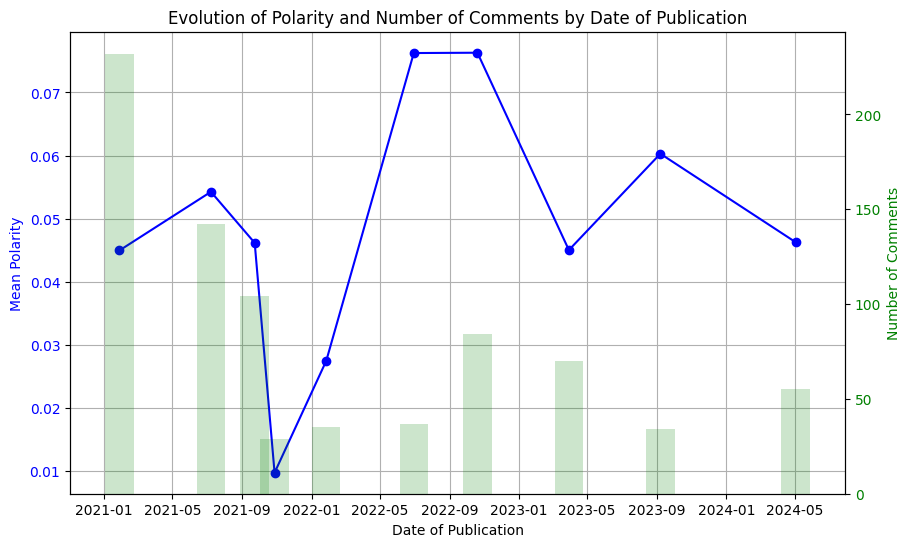

In [39]:
# Evolution de la polarité des commentaires d'un youtubeur

df_commentaires =  pd.DataFrame({})
for i in vilebrequin_videos:
    df = pd.read_csv(f'data/dataframes/{i}.csv')
    df['video_id'] = i
    
    
    infos = pd.read_json(f'data/infos/{i}_infos.json', typ='series')
    df['date_publication'] = infos['date_publication']
    
    df_commentaires = pd.concat([df_commentaires, df])
    
df_tmp = df_commentaires[df_commentaires['comment'].str.contains('vpn', case=False, na=False)]

# Convert 'date_publication' to datetime
df_tmp['date_publication'] = pd.to_datetime(df_tmp['date_publication'])

# Group by date and calculate mean polarity
polarity_by_date = df_tmp.groupby(df_tmp['date_publication'].dt.date)['polarity'].mean()

# Group by date and count number of comments
comments_by_date = df_tmp.groupby(df_tmp['date_publication'].dt.date).size()

# Plot the evolution of polarity
fig, ax1 = plt.subplots(figsize=(10, 6))

ax1.plot(polarity_by_date.index, polarity_by_date.values, marker='o', color='b')
ax1.set_xlabel('Date of Publication')
ax1.set_ylabel('Mean Polarity', color='b')
ax1.tick_params(axis='y', labelcolor='b')
ax1.set_title('Evolution of Polarity and Number of Comments by Date of Publication')
ax1.grid(True)

# Create a secondary y-axis to plot the number of comments
ax2 = ax1.twinx()
ax2.bar(comments_by_date.index, comments_by_date.values, alpha=0.2, color='g', width=50)
ax2.set_ylabel('Number of Comments', color='g')
ax2.tick_params(axis='y', labelcolor='g')

plt.show()   
    

In [ ]:
# comparaison general de la polarité entre tout les youtubeurs

df_commentaires =  pd.DataFrame({})
for j in [squeezie_videos, vilebrequin_videos, amixem_videos, joueur_du_grenier_videos, cyrus_north_videos, djilsi_videos, mcfly_et_carlito_videos
, pierre_croce_videos, dr_nozman_videos, fabien_olicard_videos, mathieu_sommet_videos, cyprien_videos, math_videos, poisson_fecond_videos]:
    for i in j:
        df = pd.read_csv(f'data/dataframes/{i}.csv')
        df['video_id'] = i
        infos = pd.read_json(f'data/infos/{i}_infos.json', typ='series')
        df['date_publication'] = infos['date_publication']
        df['youtubeur'] = infos['canal']
        df_commentaires = pd.concat([df_commentaires, df])
    print(infos['canal'])
df_tmp = df_commentaires[df_commentaires['comment'].str.contains('vpn', case=False, na=False)]


SQUEEZIE
Vilebrequin
Amixem
Joueur Du Grenier
Cyrus North
Djilsi
Mcfly et Carlito
Pierre Croce
Dr Nozman
FabienOlicard
Mathieu Sommet
Cyprien
MATH
Conte Fécond


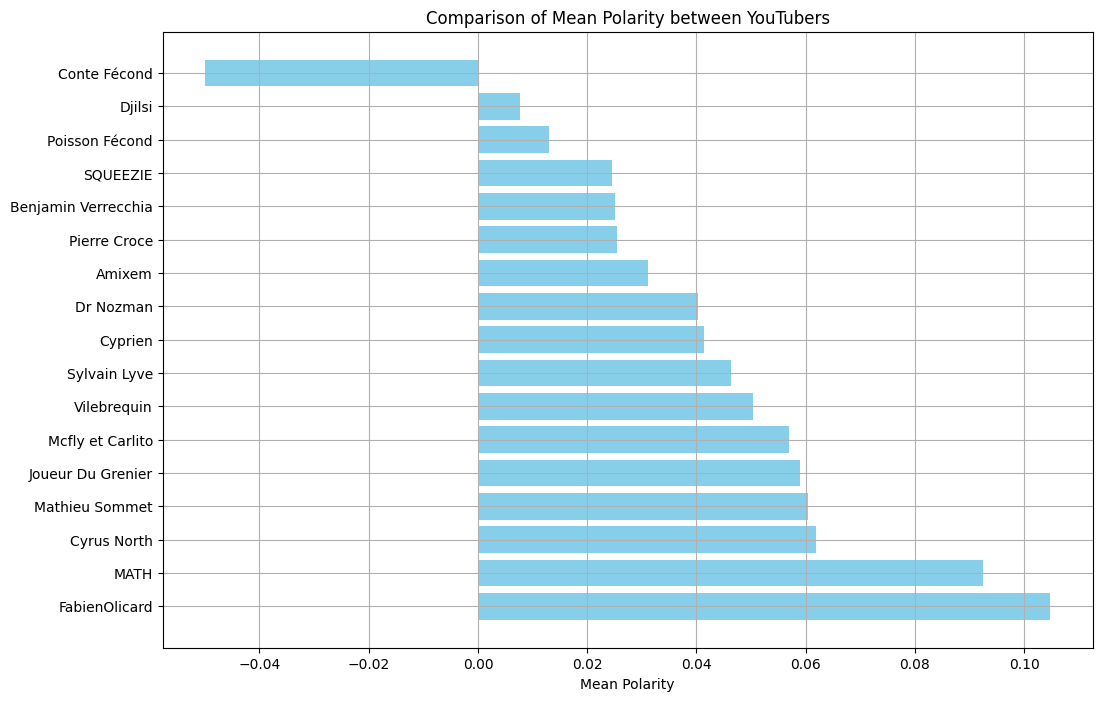

In [ ]:
# Group by date and calculate mean polarity
polarity_by_youtubeur = df_tmp.groupby(df_tmp['youtubeur'])['polarity'].mean()

# Group by date and count number of comments
comments_by_youtubeur = df_tmp.groupby(df_tmp['youtubeur']).size()

# Sort by polarity in descending order
polarity_by_youtubeur = polarity_by_youtubeur.sort_values(ascending=False)

# Plot the comparison of polarity between YouTubers
fig, ax = plt.subplots(figsize=(12, 8))
ax.barh(polarity_by_youtubeur.index, polarity_by_youtubeur.values, color='skyblue')
ax.set_xlabel('Mean Polarity')
ax.set_title('Comparison of Mean Polarity between YouTubers')
ax.grid(True)

plt.show()

In [ ]:
'''Quels mots reviennent le plus souvent dans les commentaires quand on parle de NordVPN ?'''
# 2 nuage de mots qui reviennent en rapport avec nordvpn en fonction de la polarité pos vs neg

df_polarity_pos = df_tmp[df_tmp['polarity'] > 0]
df_polarity_neg = df_tmp[df_tmp['polarity'] < 0]

word_cloud(df_polarity_pos, nlp)

c:\Users\hervo\Documents\Cours\M2 MAS\Text_Mining_Project\utils\def_utils.py:112: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

c:\Users\hervo\Documents\Cours\M2 MAS\Text_Mining_Project\utils\def_utils.py:115: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

c:\Users\hervo\Documents\Cours\M2 MAS\Text_Mining_Project\utils\def_utils.py:116: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

In [47]:

word_cloud(df_polarity_neg, nlp)

c:\Users\hervo\Documents\Cours\M2 MAS\Text_Mining_Project\utils\def_utils.py:112: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

c:\Users\hervo\Documents\Cours\M2 MAS\Text_Mining_Project\utils\def_utils.py:115: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

c:\Users\hervo\Documents\Cours\M2 MAS\Text_Mining_Project\utils\def_utils.py:116: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

In [4]:
import plotly.express as px
from collections import Counter
from spacytextblob.spacytextblob import SpacyTextBlob
from wordcloud import WordCloud

def word_cloud(df,nlp):
    df = df[df['comment'].str.contains('vpn', case=False, na=False)]
    print(len(df))
    
    # Depuis comment recupéré les mots clés (mettre en minuscule, supprimer les stopwords et les mots de moins de 3 lettres, lemmatiser)
    keywords = []
    for comment in df['comment']:
        doc = nlp(comment)
        for token in doc:
            if token.is_alpha and len(token.text) > 2:
                keywords.append(token.lemma_.lower())

    print("step2")
    #retirer vpn et nord des mots clés
    keywords = [keyword for keyword in keywords if keyword not in ['vpn', 'nord','nordvpn','nvpn']]
    #retirer les stopwords
    keywords = [keyword for keyword in keywords if keyword not in nlp.Defaults.stop_words]
    print("step3")
    counter = Counter(keywords)
    
    wordcloud = WordCloud(width=3000, height=1000, 
                          background_color='white', 
                          stopwords=None, 
                          min_font_size=10).generate_from_frequencies(counter)
    print("step4")
    fig = px.imshow(wordcloud, title="Nuage de mots des Commentaires")
    fig.update_xaxes(visible=False) 
    fig.update_yaxes(visible=False)
    
    return fig

In [3]:
from utils.def_utils import all_comments,word_cloud

df = all_comments()
display(len(df))

# word_cloud(df, nlp, keyword_sheet_id='test', want_to_save=True)

420650

In [14]:
word_cloud(df, nlp, keyword_sheet_id='pola_neg')

ValueError: 
Image export using the "kaleido" engine requires the kaleido package,
which can be installed using pip:
    $ pip install -U kaleido
